<a href="https://colab.research.google.com/github/keinerfan/CIAP1/blob/CODES/iap_morgan_fingerprint_tweaking_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ffnn morgan iap1**

Epoch:   0 Training loss: 6.34
Epoch:  10 Training loss: 1.33
Epoch:  20 Training loss: 1.20
Epoch:  30 Training loss: 0.93
Epoch:  40 Training loss: 0.86
Epoch:  50 Training loss: 0.71
Epoch:  60 Training loss: 0.68
Epoch:  70 Training loss: 0.67
Epoch:  80 Training loss: 0.52
Epoch:  90 Training loss: 0.43
Epoch: 100 Training loss: 0.36
Epoch: 110 Training loss: 0.36
Epoch: 120 Training loss: 0.33
Epoch: 130 Training loss: 0.32
Epoch: 140 Training loss: 0.34
Epoch: 150 Training loss: 0.35
Epoch: 160 Training loss: 0.31
Epoch: 170 Training loss: 0.32
Epoch: 180 Training loss: 0.36
Epoch: 190 Training loss: 0.37


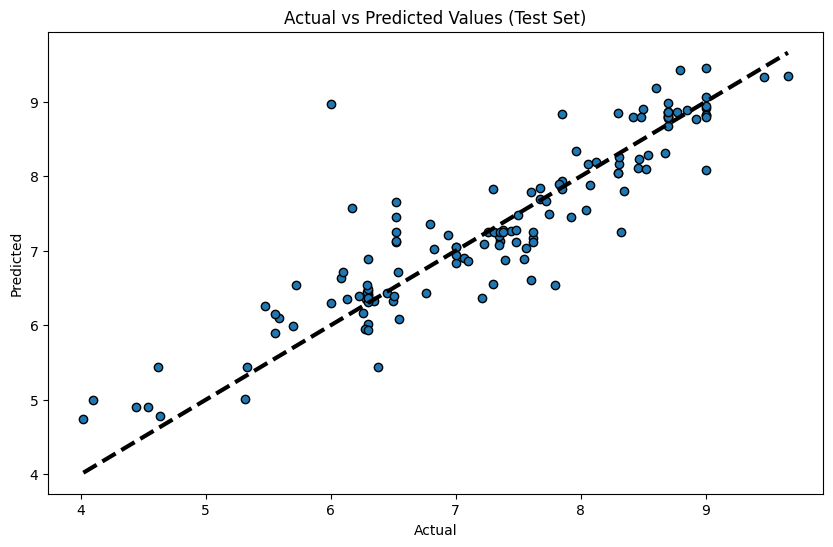

Training Set Metrics:
R-Squared: 0.9349762194828963
Adjusted R-Squared: 0.9244204109573925
Mean Squared Error (MSE): 0.11561057716608047
Mean Absolute Error (MAE): 0.24750566482543945
Mean Absolute Percentage Error (MAPE): 3.8970675319433212

Testing Set Metrics:
R-Squared: 0.8210493765723983
Adjusted R-Squared: 0.5935697705203622
Mean Squared Error (MSE): 0.26114463806152344
Mean Absolute Error (MAE): 0.3547993302345276
Mean Absolute Percentage Error (MAPE): 5.259528011083603


In [24]:
# -*- coding: utf-8 -*-
"""multi_layer_perceptron_for_BICR.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1u2-xk0FuW_rHBLNHdmKI9TqmS-T7Itfq
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/keinerfan/CIAP1/DATA-SETS/IAP1_06_morgan_fp.csv')

y = data.pIC50.values.reshape((-1,1))
scaler = StandardScaler()


data = data.drop(['pIC50'] , axis = 1 )
# Feature selection using VarianceThreshold
from sklearn.decomposition import PCA

pca = PCA(n_components=75)
pca.fit(data)
merged_data = pca.transform(data)
# Prepare X and y
x = merged_data


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(merged_data, y, test_size=0.2, random_state=42)

# Normalize y using StandardScaler

# Convert data to PyTorch tensors
device = torch.device("cpu")
X_train = torch.tensor(X_train, device=device).float()
X_test = torch.tensor(X_test, device=device).float()
y_train = torch.tensor(y_train, device=device).float()
y_test = torch.tensor(y_test, device=device).float()
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
import torch
import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_rate, out_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)  # Added fourth layer
        #self.fc5 = nn.Linear(hidden_size, hidden_size)  #Added fifth layer
        self.fc_out = nn.Linear(hidden_size, out_size)
        self.ln1 = nn.LayerNorm(hidden_size)
        self.ln2 = nn.LayerNorm(hidden_size)
        self.ln3 = nn.LayerNorm(hidden_size)
        self.ln4 = nn.LayerNorm(hidden_size)
        #self.ln5 = nn.LayerNorm(hidden_size)  # Added layer norm for fifth layer
        self.activation = nn.LeakyReLU()
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        out = self.fc1(x)
        out = self.ln1(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc2(out)
        out = self.ln2(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc3(out)
        out = self.ln3(out)
        out = self.activation(out)
        out = self.dropout(out)

        out = self.fc4(out)
        out = self.ln4(out)  # Apply layer normalization
        out = self.activation(out)
        out = self.dropout(out)

        #out = self.fc5(out)
        #out = self.ln5(out)  # Apply layer normalization
        #out = self.activation(out)
        #out = self.dropout(out)

        out = self.fc_out(out)
        return out

# Define hyperparameters
input_size = 75
hidden_size = 1024
dropout_rate = 0.8  # Experiment with different dropout rates
output_size = 1
learning_rate = 0.01

# Initialize model, criterion, and optimizer
model = Net(input_size, hidden_size, dropout_rate, output_size)
criterion = nn.MSELoss()  # Use nn.CrossEntropyLoss() for classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Example training loop (assuming train_loader and validation setup is in place)

# Training loop
model.train()
epochs = 200
for e in range(epochs):
    running_loss = 0
    for fps, labels in train_loader:
        optimizer.zero_grad()
        output = model(fps)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        if e % 10 == 0:
            print(f"Epoch: {e:3d} Training loss: {running_loss / len(train_loader):.2f}")

# Evaluation on test set
model.eval()
y_pred_test = model(X_test)

#model evaluation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
#y_pred_test = mlp(X_test)
#r2_test = r2_score(y_test.detach().numpy(), y_pred_test.detach().numpy())
y_train_pred = model(X_train)
y_test_pred = model(X_test)
#converting to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()
# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')
